# Sentinel 3: SLSTR Data For UK

The Copernicus Data Space Ecosystem (https://dataspace.copernicus.eu) is an open ecosystem that provides free instant access to a wide range of data and services from the Copernicus Sentinel missions. 

The third sentinel mission,Sentinel-3, is a multi-instrument mission to measure sea surface topography, sea and land surface temperature, ocean colour and land colour with high end accuracy and reliability. The mission supports ocean forecasting systems, as well as environmental and climate monitoring. Sentinel-3A was launched on 16 February 2016 and Sentinel-3B joined its twin in orbit on 25 April 2018.

One of the instruments on this satellite was the Sea and Land Surface Temperature Radiometer (SLSTR). From the Copernicus Data Space Ecosystem, four NetCDF files providing Level 2 Sentinel-3 land surface temperature data can be downloaded, which were measured using the SLSTR instrument. 

In [1]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib notebook
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib

import numpy as np

import matplotlib.pyplot as plt


# Let printing work the same in Python 2 and 3
from __future__ import division,print_function

# notice two underscores _ either side of future

import xarray as xr
import netCDF4 as nc

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [12]:
data = xr.open_dataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/LST_in.nc")
#data_temp = xr.open_mfdataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/LST_in.nc", parallel=False)

#data_temp = xr.open_mfdataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/LST_*.nc", combine='nested', compat='override')
data_temp = xr.open_mfdataset(r"/Users/anvijoy/Desktop/Anvi/Uni Notes/Internal Placement/LST_*.nc", combine='nested', concat_dim='time')


In [13]:
# Prints all the variables listed in the .nc file
print(data_temp.data_vars)

Data variables:
    LST                     (time, rows, columns) float32 14MB dask.array<chunksize=(1, 1200, 1500), meta=np.ndarray>
    LST_orphan              (time, rows, orphan_pixels) float32 2MB dask.array<chunksize=(1, 1200, 187), meta=np.ndarray>
    LST_uncertainty         (time, rows, columns) float32 14MB dask.array<chunksize=(1, 1200, 1500), meta=np.ndarray>
    LST_uncertainty_orphan  (time, rows, orphan_pixels) float32 2MB dask.array<chunksize=(1, 1200, 187), meta=np.ndarray>
    exception               (time, rows, columns) int16 7MB dask.array<chunksize=(1, 1200, 1500), meta=np.ndarray>
    exception_orphan        (time, rows, orphan_pixels) int16 898kB dask.array<chunksize=(1, 1200, 187), meta=np.ndarray>


In [14]:
# Prints all the dimensions listed in the .nc file
print(data_temp.dims)

FrozenMappingWarningOnValuesAccess({'time': 2, 'rows': 1200, 'columns': 1500, 'orphan_pixels': 187})


In [17]:
# Prints all the attributes listed in the .nc file
print(data_temp.attrs)

{'absolute_orbit_number': 48541, 'comment': ' ', 'contact': 'eosupport@copernicus.esa.int', 'creation_time': '20250613T004003Z', 'history': '  2025-06-13T00:40:03Z: PUGCoreProcessor joborder.27819127.xml', 'institution': 'PS1', 'netCDF_version': '4.2 of Jan 13 2023 10:05:23 $', 'processing_baseline': 'SL__LST.004.08.00', 'product_name': 'S3A_SL_2_LST____20250612T220906_20250612T221206_20250613T004003_0179_127_058_0900_PS1_O_NR_004.SEN3', 'references': 'S3IPF PDS 005.2 - i2r10 - Product Data Format Specification - SLSTR Level 2 Land, S3IPF PDS 002 - i1r8 - Product Data Format Specification - Product Structures, S3IPF DPM 007 - i1r14 - Detailed Processing Model - SLSTR Level 2', 'resolution': '[ 1000 1000 ]', 'source': 'IPF-SL-2 06.24', 'start_offset': 6061, 'start_time': '2025-06-12T22:09:06.091747Z', 'stop_time': '2025-06-12T22:12:05.783234Z', 'title': 'SLSTR Level 2 Product, Land Surface Temperature measurement', 'track_offset': 998}


In [19]:
# Prints the data of the variable
print(data_temp.LST)

<xarray.DataArray 'LST' (time: 2, rows: 1200, columns: 1500)> Size: 14MB
dask.array<concatenate, shape=(2, 1200, 1500), dtype=float32, chunksize=(1, 1200, 1500), chunktype=numpy.ndarray>
Dimensions without coordinates: time, rows, columns
Attributes:
    long_name:      Gridded Land Surface Temperature
    standard_name:  surface_temperature
    units:          K
    valid_max:      32767
    valid_min:      -32767


In [27]:
# Variables can be converted to numpy arrays
data_temp_one_year = data.LST.values
data_temp_all_months = data_temp.LST.values

# Print the shape of the numpy array
print(data_temp_one_year.shape)
print(data_temp_all_months.shape)

(1200, 1500)
(2, 1200, 1500)


In [55]:
print(data_temp_one_year)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


Most of grid cells are filled with 'nan' (not a number) values

<IPython.core.display.Javascript object>


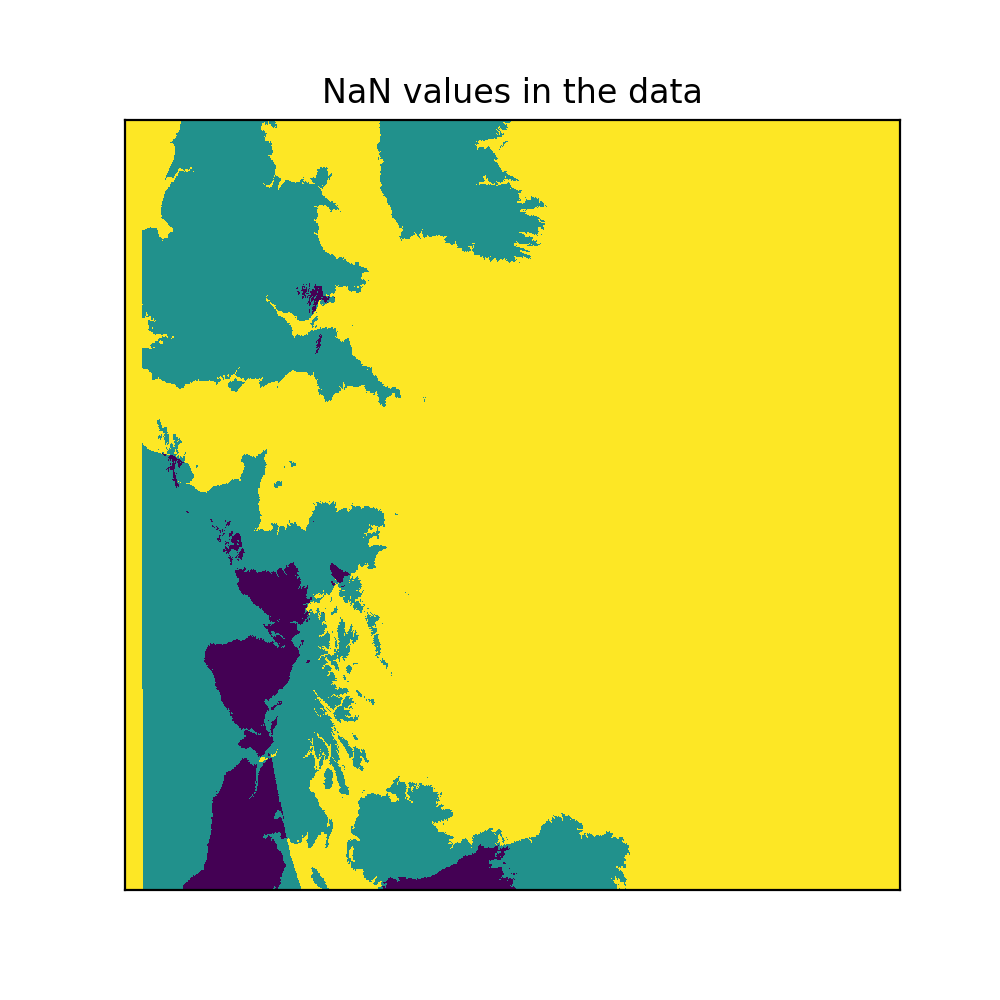

In [57]:
import matplotlib.pyplot as plt

temperature_data = data_temp['LST']

plt.figure(figsize=(5, 5))
ax = temperature_data.isnull().sum(dim='time').plot(add_colorbar=False)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()